In [1]:
push!(LOAD_PATH,"../../../ExoJulia/")
push!(LOAD_PATH,".")

include("../../hw2/Jake_Dave/utils.jl")
include("../../hw2/Jake_Dave/orbital_utils.jl")
include("../../hw2/Jake_Dave/rv.jl")
include("transit_utils.jl")
include("transit_loglike.jl")
include("transit_model.jl")

using ExoJulia
using PyPlot
using Optim

# Read in the data

In [2]:
data = readdlm("mystery_planet2.txt");
time = data[:,1];
flux = data[:,2];
mean_flux = flux/median(flux)
err = data[:,3];

# What's the data look like?

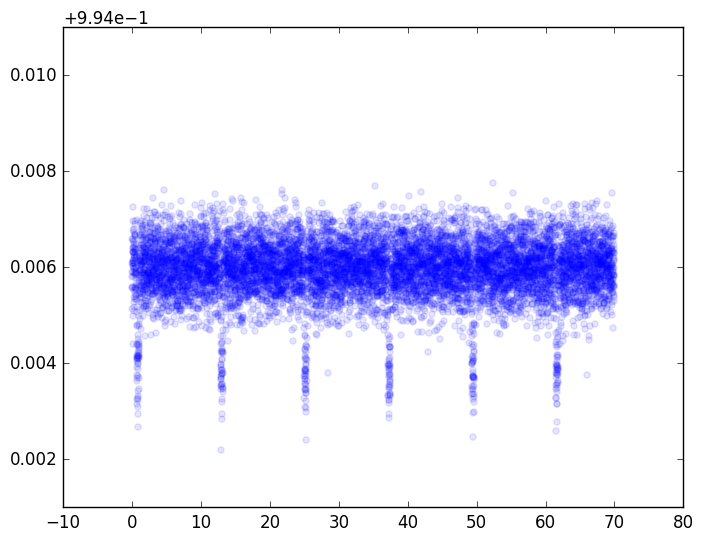

(0.995,1.005)

In [3]:
scatter(time,mean_flux, color="blue", alpha=0.1)
ylim(0.995,1.005)

# Estimate transit parameters to initialize fits.
The function below estimates the period using the Agol periodogram, the transit depth and the time of 1st transit center.

In [4]:
#Returns est_params = [ dF, tT, tF, P, tE ]
est_params = guess_params()
best_period = est_params[4];
best_tE = est_params[5];

# Phase fold with the fitted period to see if it works.

In [5]:
data_fold = copy(data)
data_fold[:,1] = mod(time - time[1], best_period);
data_fold = fastsortrows(data_fold,[1]);

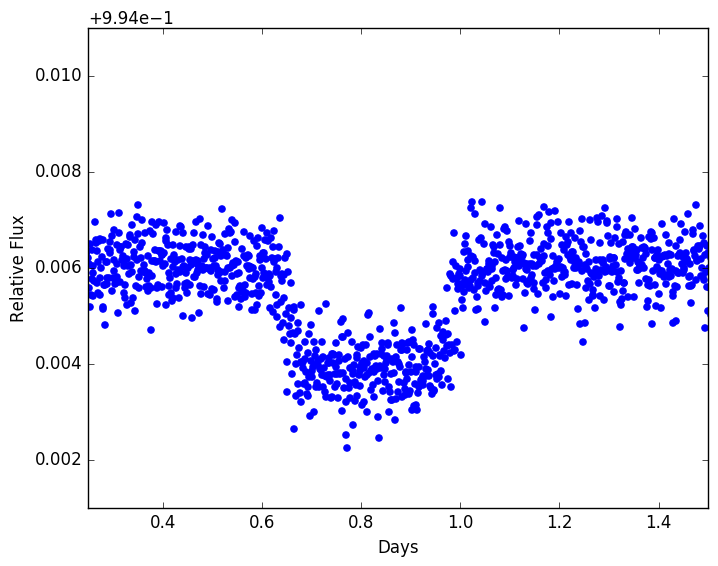

PyObject <matplotlib.text.Text object at 0x3139d53d0>

In [6]:
scatter(data_fold[:,1],data_fold[:,2]/mean(data_fold[:,2]),color="blue")
ylim(0.995,1.005)
xlim(0.25,1.5)

ylabel("Relative Flux")
xlabel("Days")

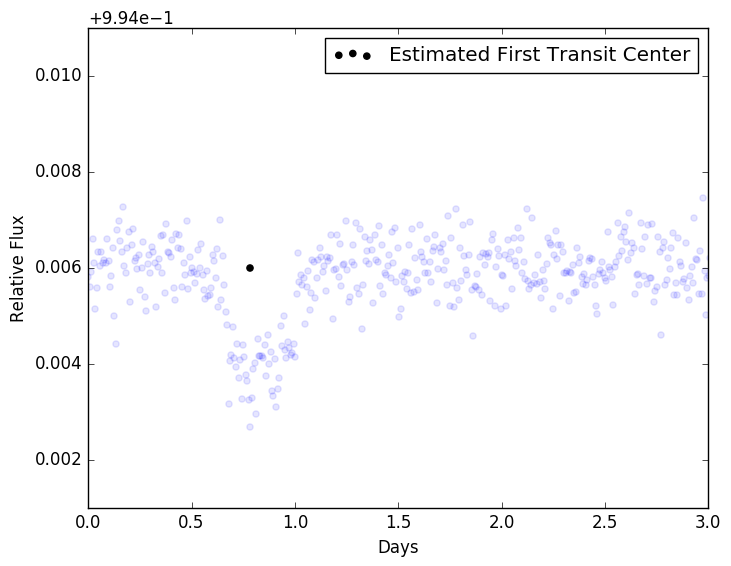

PyObject <matplotlib.text.Text object at 0x313fe5450>

In [7]:
scatter(time,mean_flux, color="blue", alpha=0.1)
scatter(est_params[5], 1.0, alpha=1.0, color="k", label="Estimated First Transit Center")
ylim(0.995,1.005)
xlim(0.0, 3.0)
legend(loc=0)

ylabel("Relative Flux")
xlabel("Days")

# Try fitting this model with optim

In [18]:
# params [ dF, tT, tF, P, tE ]
params = est_params

optimum = optimize(transit_loglike_observables_optim, params, iterations=5000, method=:l_bfgs)

Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [0.003275200297721881,0.30428678678678683, ...]
 * Minimum: [0.002128906087094433,0.3486987334929955, ...]
 * Value of Function at Minimum: 0.000010
 * Iterations: 42
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-08: false
   * |g(x)| < 1.0e-08: true
   * Exceeded Maximum Number of Iterations: false
 * Objective Function Calls: 173
 * Gradient Call: 173

In [19]:
best_optim = optimum.minimum

5-element Array{Float64,1}:
  0.00212891
  0.348699  
  0.298399  
 12.1647    
  0.83449   

# How well does it fit?

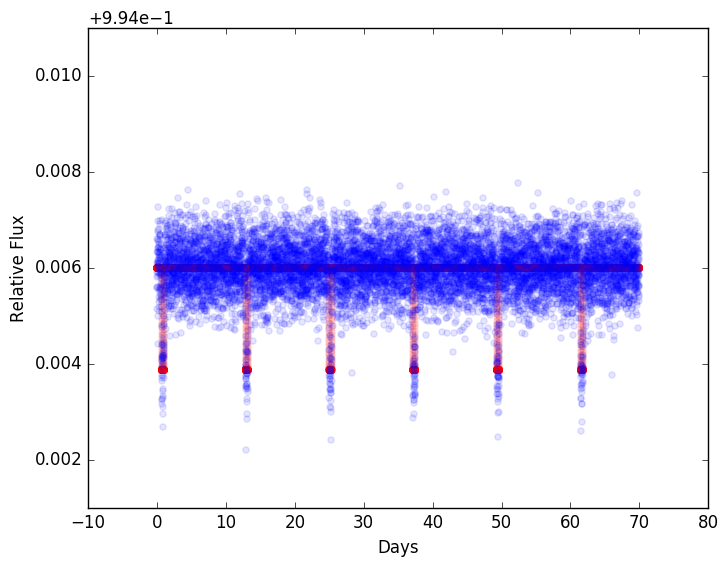

In [20]:
plot_results_full(best_optim)

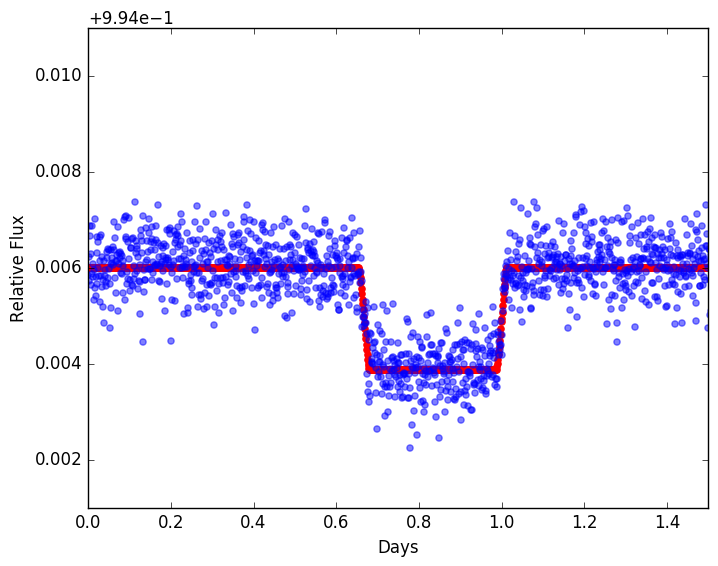

In [21]:
plot_results_folded(best_optim)

# Get the physical parameters!

In [22]:
# Returns [P, dF, b_est, tT, rho_est]
phys = observable_to_physical(best_optim)
print("Best Fit Period: $(phys[1]) days.\n")
print("Best Fit Depth: $(phys[2]).\n")
print("Best Fit Impact Parameter: $(phys[3]).\n")
print("Best Fit Transit Time: $(phys[4]) days.\n")
print("Best Fit Stellar Density: $(phys[5]) solar density.\n")

Best Fit Period: 12.164741431900385 days.
Best Fit Depth: 0.002128906087094433.
Best Fit Impact Parameter: 0.6352835331272751.
Best Fit Transit Time: 0.3486987334929955 days.
Best Fit Stellar Density: 0.07211911477714779 solar density.
